
Google Patent Search tool:

https://patents.google.com/?q=AB%3d(%22Blockchain%22)+OR+AB%3d(%22Cryptocurrency%22)+OR+AB%3d(%22bitcoin%22)+OR+AB%3d(%22consensus+mechanism%22)+OR+AB%3d(%22smart+contract%22)+OR+AB%3d(%22digital+asset%22)+OR+AB%3d(%22non-fungible+token%22)+OR+AB%3d(%22decentralized+finance%22)+OR+AB%3d(%22initial+coin+offering%22)+OR+AB%3d(%22decentralized+autonomous+organization%22)+OR+AB%3d(%22decentralized+application%22)+OR+AB%3d(%22Ethereum%22)+OR+AB%3d(%22Token+Standards%22)&country=US&before=priority:20230101&after=priority:20090101&dups=language


| Type | Query |
|---|---|
| Search in the abstract | AB=("Blockchain") OR AB=("Cryptocurrency") OR AB=("bitcoin") OR AB=("consensus mechanism") OR AB=("smart contract") OR AB=("digital asset") OR AB=("non-fungible token") OR AB=("decentralized finance") OR AB=("initial coin offering") OR AB=("decentralized autonomous organization") OR AB=("decentralized application") OR AB=("Ethereum") OR AB=("Token Standards"); After: priority 2009-01-01; Before: priority 2023-01-01; Country: US;  |

The patent database was queried by extracting specifics keywods from the patent's ABSTRACT 

Save the results "filingDate" and "patentNumber" into a csv file: "query_absBsm_USPT.csv"

# For Great Britain

https://worldwide.espacenet.com/patent/search?f=cc%3Ain%3Dgb&q=%28ab%20%3D%20%22Blockchain%22%20OR%20desc%20%3D%20%22Blockchain%22%29%20OR%20%28ab%20%3D%20%22Cryptocurrency%22%20OR%20desc%20%3D%20%22Cryptocurrency%22%29%20OR%20%28ab%20%3D%20%22bitcoin%22%20OR%20desc%20%3D%20%22bitcoin%22%29%20OR%20%28ab%20%3D%20%22consensus%20mechanism%22%20OR%20desc%20%3D%20%22consensus%20mechanism%22%29%20OR%20%28ab%20%3D%20%22smart%20contract%22%20OR%20desc%20%3D%20%22smart%20contract%22%29%20OR%20%28ab%20%3D%20%22digital%20asset%22%20OR%20desc%20%3D%20%22digital%20asset%22%29%20OR%20%28ab%20%3D%20%22non-fungible%20token%22%20OR%20desc%20%3D%20%22non-fungible%20token%22%29%20OR%20%28ab%20%3D%20%22decentralized%20finance%22%20OR%20desc%20%3D%20%22decentralized%20finance%22%29%20OR%20%28ab%20%3D%20%22initial%20coin%20offering%22%20OR%20desc%20%3D%20%22initial%20coin%20offering%22%29%20OR%20%28ab%20%3D%20%22decentralized%20autonomous%20organization%22%20OR%20desc%20%3D%20%22decentralized%20autonomous%20organization%22%29%20OR%20%28ab%20%3D%20%22decentralized%20application%22%20OR%20desc%20%3D%20%22decentralized%20application%22%29&queryLang=en%3Ade%3Afr

| Type | Query |
|---|---|
| Search in the abstract<br>and description | (ab = "Blockchain" OR desc = "Blockchain") OR (ab = "Cryptocurrency" OR desc = "Cryptocurrency") OR (ab = "bitcoin" OR desc = "bitcoin") OR (ab = "consensus mechanism" OR desc = "consensus mechanism") OR (ab = "smart contract" OR desc = "smart contract") OR (ab = "digital asset" OR desc = "digital asset") OR (ab = "non-fungible token" OR desc = "non-fungible token") OR (ab = "decentralized finance" OR desc = "decentralized finance") OR (ab = "initial coin offering" OR desc = "initial coin offering") OR (ab = "decentralized autonomous organization" OR desc = "decentralized autonomous organization") OR (ab = "decentralized application" OR desc = "decentralized application") |

These are the two ways that the patent database could be queried but fo the purpose of this research, we will first extract the keywords from the patent's ABSTARCT and DESCRIPTION

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from time import time

In [142]:
df_USlist = pd.read_csv("output.csv", index_col="priority_date", parse_dates=True, low_memory=False)

df_USlist.id = df_USlist.id.replace("US-", "", regex=True)
df_USlist.id = df_USlist.id.replace("-A1", "", regex=True)
df_USlist.id = df_USlist.id.replace("-B1", "", regex=True)
df_USlist.id = df_USlist.id.replace("-B2", "", regex=True)
df_USlist.id = pd.to_numeric(df_USlist.id, errors='coerce', downcast='integer')
print(df_USlist.head(10))

df_UKlist = pd.read_csv("query_absDesc_Espace.csv", index_col="filingDate", parse_dates=True, low_memory=False)
df_UKlist.familyNumber = pd.to_numeric(df_UKlist.familyNumber, errors='coerce', downcast='integer')
print(df_UKlist.head())

                         id  cite_number
priority_date                           
08/01/2017     2.023186e+09         56.0
08/01/2017     1.110705e+07         56.0
08/01/2017     1.157429e+07         56.0
08/01/2017     2.020027e+09         56.0
08/01/2017     2.021074e+09         56.0
07/08/2018     2.021174e+09         13.0
28/08/2020     2.022068e+09          2.0
30/03/2018     2.021082e+09         36.0
28/08/2020     1.135474e+07          2.0
28/02/2019     2.020279e+09          9.0
            familyNumber                                            company
filingDate                                                                 
10/04/2019      72749305  AKIVA CAPITAL HOLDINGS LLC [US] \nAKIVA CAPITA...
23/02/2016      58191502                           NCHAIN HOLDINGS LTD [AG]
29/04/2016      56234104                           NCHAIN HOLDINGS LTD [AG]
27/09/2020      80624746                                           IBM [US]
23/02/2016      58231665                           N

In [143]:
# Convert the index to datetime format (assuming 'priority_date' is the index)
df_USlist.index = pd.to_datetime(df_USlist.index, format="%d/%m/%Y")

# Filter rows with 'priority_date' from 2010 to 2022
mask = (df_USlist.index.year > 2009) & (df_USlist.index.year <= 2022)
df_USfiltered = df_USlist[mask].copy()

print(len(df_USfiltered))
print(len(df_USfiltered.drop_duplicates(subset=["id"])))

df_USpatents = df_USfiltered.drop_duplicates(subset=["id"])


13412
13398


In [144]:
# Assuming 'filingDate' column contains dates in 'dd/mm/yyyy' format
df_UKlist['filingDate'] = pd.to_datetime(df_UKlist.index, format="%d/%m/%Y")

# Filter rows with 'filingDate' from 2010 to 2022
mask = (df_UKlist['filingDate'].dt.year > 2009) & (df_UKlist['filingDate'].dt.year <= 2022)
df_UKfiltered = df_UKlist[mask].copy()  # Make a copy to avoid the SettingWithCopyWarning

print(len(df_UKfiltered))
print(len(df_UKfiltered.drop_duplicates(subset=["familyNumber"])))

df_UKpatents = df_UKfiltered.drop_duplicates(subset=["familyNumber"])


753
753


## Calculating Innovation Index
Innovation Index = 1/patent age * Number of Citations  FCF= Forward Citation Frequency

In [145]:

current_date = datetime.date(datetime.now())
print(current_date)

df_USpatents['age'] = (current_date - df_USpatents.index.date).astype('timedelta64[D]')

# print results in years
df_USpatents['age'] = df_USpatents['age'] / np.timedelta64(1, 'Y')


#innovation_index = cite_number divided by age
df_USpatents['innovation_index'] = df_USpatents['cite_number'] / df_USpatents['age']
print(df_USpatents.head())

2023-08-29
                         id  cite_number       age  innovation_index
priority_date                                                       
2017-01-08     2.023186e+09         56.0  6.641096          8.432343
2017-01-08     1.110705e+07         56.0  6.641096          8.432343
2017-01-08     1.157429e+07         56.0  6.641096          8.432343
2017-01-08     2.020027e+09         56.0  6.641096          8.432343
2017-01-08     2.021074e+09         56.0  6.641096          8.432343


C:\Users\Akande\AppData\Local\Temp\ipykernel_15844\3600580810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USpatents['age'] = (current_date - df_USpatents.index.date).astype('timedelta64[D]')
C:\Users\Akande\AppData\Local\Temp\ipykernel_15844\3600580810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USpatents['age'] = df_USpatents['age'] / np.timedelta64(1, 'Y')
C:\Users\Akande\AppData\Local\Temp\ipykernel_15844\3600580810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

In [146]:

# Assuming df_USpatents is your DataFrame
df_USpatents['priority_date'] = pd.to_datetime(df_USpatents.index)  # Convert 'priority_date' to datetime

# Group by month and year and count the number of patents
us_patents_per_month = df_USpatents.resample('M').size().reset_index(name='number_of_patents')

# Sum of citations per month
us_patents_per_month['number_of_citations'] = df_USpatents.resample('M')['cite_number'].sum().reset_index(name='number_of_citations')['number_of_citations']

# Calculate percentage increase in patents for each month
us_patents_per_month['percentage_increase'] = us_patents_per_month['number_of_patents'].pct_change() * 100

# Calculate the mean of innovation_index for each month
us_patents_per_month['mean_innovation_index'] = df_USpatents.resample('M')['innovation_index'].mean().reset_index(name='innovation_index')['innovation_index']

# Create the final DataFrame
us_patents_data = {
    'priority_date': us_patents_per_month['priority_date'],
    'number_of_patents': us_patents_per_month['number_of_patents'],
    'percentage_increase': us_patents_per_month['percentage_increase'],
    'number_of_citations': us_patents_per_month['number_of_citations'],
    'mean_innovation_index': us_patents_per_month['mean_innovation_index']
}
us_patents_per_month_df = pd.DataFrame(us_patents_data)

print(us_patents_per_month_df)


C:\Users\Akande\AppData\Local\Temp\ipykernel_15844\2980290176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USpatents['priority_date'] = pd.to_datetime(df_USpatents.index)  # Convert 'priority_date' to datetime


    priority_date  number_of_patents  percentage_increase  \
0      2010-02-28                  1                  NaN   
1      2010-03-31                  0               -100.0   
2      2010-04-30                  2                  inf   
3      2010-05-31                  0               -100.0   
4      2010-06-30                  5                  inf   
..            ...                ...                  ...   
150    2022-08-31                  0               -100.0   
151    2022-09-30                  2                  inf   
152    2022-10-31                  1                -50.0   
153    2022-11-30                  0               -100.0   
154    2022-12-31                  2                  inf   

     number_of_citations  mean_innovation_index  
0                    9.0               0.662833  
1                    0.0                    NaN  
2                   12.0               0.447578  
3                    0.0                    NaN  
4                

In [147]:

# Assuming df_USpatents is your DataFrame
df_UKpatents.index = pd.to_datetime(df_UKpatents.index, format="%d/%m/%Y")  # Convert 'priority_date' to datetime

# Group by month and year and count the number of patents
uk_patents_per_month = df_UKpatents.resample('M').size().reset_index(name='number_of_patents')

# Sum of citations per month
#us_patents_per_month['number_of_citations'] = df_USpatents.resample('M')['cite_number'].sum().reset_index(name='number_of_citations')['number_of_citations']

# Calculate percentage increase in patents for each month
uk_patents_per_month['percentage_increase'] = uk_patents_per_month['number_of_patents'].pct_change() * 100

# Create the final DataFrame
uk_patents_data = {
    'filingDate': uk_patents_per_month['filingDate'],
    'number_of_patents': uk_patents_per_month['number_of_patents'],
    'percentage_increase': uk_patents_per_month['percentage_increase']
}
uk_patents_per_month_df = pd.DataFrame(uk_patents_data)

print(uk_patents_per_month_df)


    filingDate  number_of_patents  percentage_increase
0   2010-03-31                  1                  NaN
1   2010-04-30                  0               -100.0
2   2010-05-31                  0                  NaN
3   2010-06-30                  0                  NaN
4   2010-07-31                  0                  NaN
..         ...                ...                  ...
148 2022-07-31                  0                  NaN
149 2022-08-31                  0                  NaN
150 2022-09-30                  0                  NaN
151 2022-10-31                  0                  NaN
152 2022-11-30                  1                  inf

[153 rows x 3 columns]


In [148]:
df_USpatents['priority_date'] = pd.to_datetime(df_USpatents['priority_date'])

# Group by year and month and count the number of patents
us_patents_per_month = df_USpatents.resample('M', on='priority_date').size().reset_index(name='number_of_patents')

# Calculate moving average per month
us_patents_per_month['moving_average'] = us_patents_per_month['number_of_patents'].rolling(window=3).mean()

# Calculate standard deviation of patents for each month
us_patents_per_month['standard_deviation'] = us_patents_per_month['number_of_patents'].rolling(window=3).std()


# Sum of citations per month
us_patents_per_month['number_of_citations'] = df_USpatents.resample('M')['cite_number'].sum().reset_index(name='number_of_citations')['number_of_citations']

# calculate the mean of innovation_index for each month
us_patents_per_month['mean_innovation_index'] = df_USpatents.resample('M')['innovation_index'].mean().reset_index(name='innovation_index')['innovation_index']

# Extract year and month
us_patents_per_month['year'] = us_patents_per_month['priority_date'].dt.year
us_patents_per_month['month'] = us_patents_per_month['priority_date'].dt.month

# Calculate percentage increase in patents for each month
us_patents_per_month['percentage_increase'] = us_patents_per_month['number_of_patents'].pct_change() * 100




C:\Users\Akande\AppData\Local\Temp\ipykernel_15844\1496437333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USpatents['priority_date'] = pd.to_datetime(df_USpatents['priority_date'])


In [149]:
df_UKpatents['filingDate'] = pd.to_datetime(df_UKpatents['filingDate'])

# Group by year and month and count the number of patents
uk_patents_per_month = df_UKpatents.resample('M', on='filingDate').size().reset_index(name='number_of_patents')

# Sum of citations per month
#uk_patents_per_month['number_of_citations'] = df_USpatents.resample('M')['cite_number'].sum().reset_index(name='number_of_citations')['number_of_citations']

# Extract year and month
uk_patents_per_month['year'] = uk_patents_per_month['filingDate'].dt.year
uk_patents_per_month['month'] = uk_patents_per_month['filingDate'].dt.month

# Calculate moving average per month
uk_patents_per_month['moving_average'] = uk_patents_per_month['number_of_patents'].rolling(window=3).mean()

# Calculate standard deviation of patents for each month
uk_patents_per_month['standard_deviation'] = uk_patents_per_month['number_of_patents'].rolling(window=3).std()

# Calculate percentage increase in patents for each month
uk_patents_per_month['percentage_increase'] = uk_patents_per_month['number_of_patents'].pct_change() * 100



In [150]:

print(us_patents_per_month.head(10))
print(uk_patents_per_month.head(10))


  priority_date  number_of_patents  moving_average  standard_deviation  \
0    2010-02-28                  1             NaN                 NaN   
1    2010-03-31                  0             NaN                 NaN   
2    2010-04-30                  2        1.000000            1.000000   
3    2010-05-31                  0        0.666667            1.154701   
4    2010-06-30                  5        2.333333            2.516611   
5    2010-07-31                  4        3.000000            2.645751   
6    2010-08-31                  1        3.333333            2.081666   
7    2010-09-30                  0        1.666667            2.081666   
8    2010-10-31                  0        0.333333            0.577350   
9    2010-11-30                  3        1.000000            1.732051   

   number_of_citations  mean_innovation_index  year  month  \
0                  9.0               0.662833  2010      2   
1                  0.0                    NaN  2010      3   

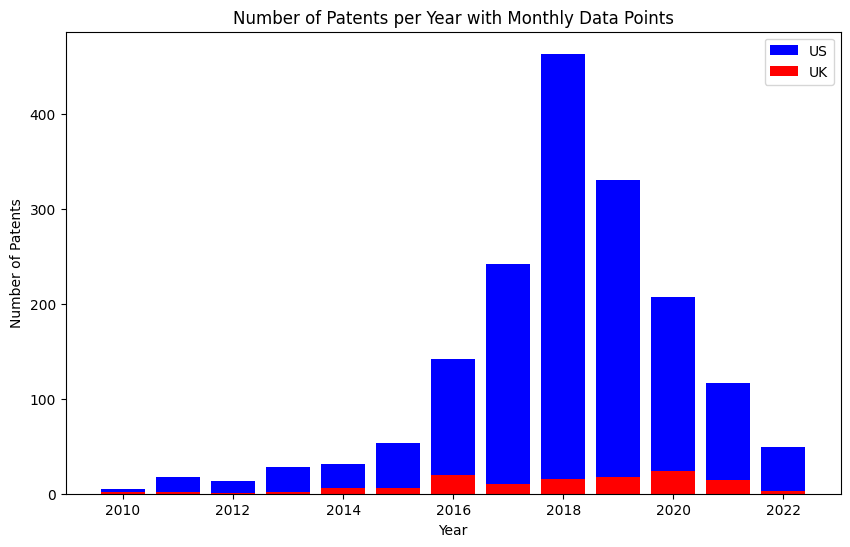

In [151]:
# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
#plot barchart with x-axis as year, y-axis as number of patents
plt.bar(x='year', height='number_of_patents', data=us_patents_per_month, color='blue')
plt.bar(x='year', height='number_of_patents', data=uk_patents_per_month, color='red')

#sns.barplot(x='year', y='number_of_patents', hue='month', data=us_patents_per_month)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.title('Number of Patents per Year with Monthly Data Points')
plt.legend(['US','UK'])

# Show the plot
plt.show()

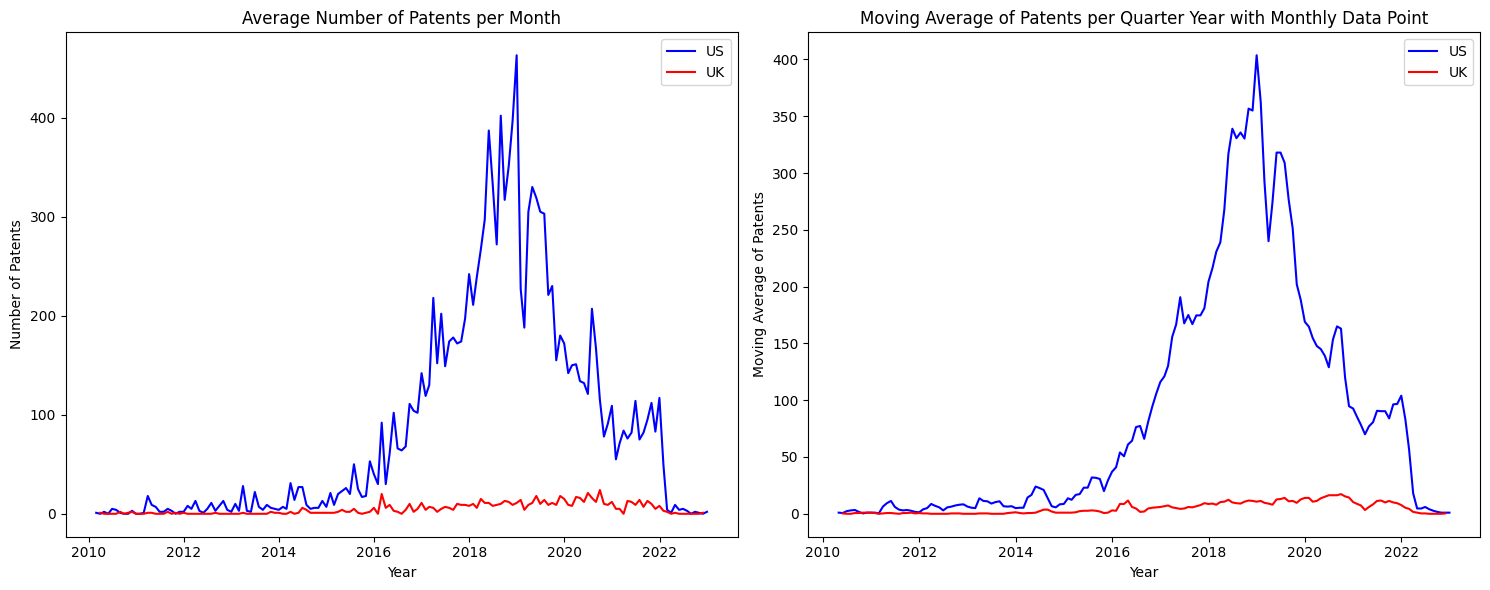

In [152]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Average Number of Patents per Month
axes[0].plot(us_patents_per_month['priority_date'], us_patents_per_month['number_of_patents'], color='blue')
axes[0].plot(uk_patents_per_month['filingDate'], uk_patents_per_month['number_of_patents'], color='red')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Patents')
axes[0].set_title('Average Number of Patents per Month')
axes[0].legend(['US', 'UK'])

# Plot 2: Number of Patents per Quarter Year (Rolling Mean)
# axes[1].plot(us_patents_per_month['priority_date'], us_patents_per_month['number_of_patents'].rolling(3).mean(), color='blue')
# axes[1].plot(uk_patents_per_month['filingDate'], uk_patents_per_month['number_of_patents'].rolling(3).mean(), color='red')
# axes[1].set_xlabel('Year')
# axes[1].set_ylabel('Number of Patents')
# axes[1].set_title('Number of Patents per Quarter Year with Monthly Data Points')
# axes[1].legend(['US', 'UK'])

# Plot 3: Moving Average of Patents per Quarter Year (Rolling Mean)
axes[1].plot(us_patents_per_month['priority_date'], us_patents_per_month['moving_average'], color='blue')
axes[1].plot(uk_patents_per_month['filingDate'], uk_patents_per_month['moving_average'], color='red')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Moving Average of Patents')
axes[1].set_title('Moving Average of Patents per Quarter Year with Monthly Data Point')
axes[1].legend(['US', 'UK'])



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


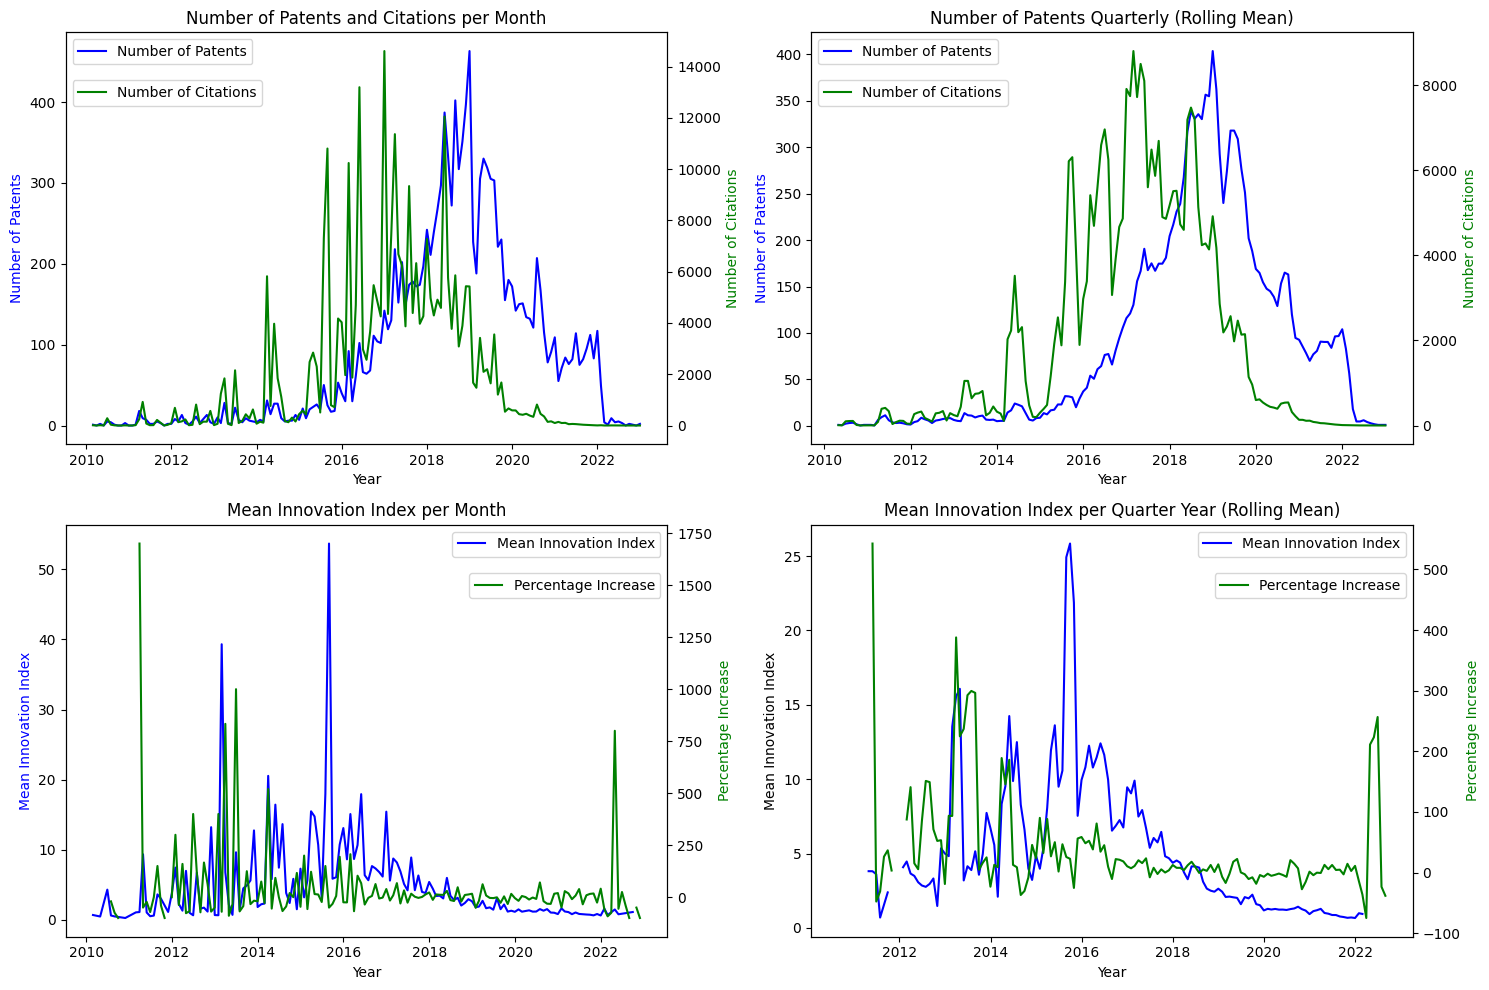

In [153]:

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: Number of patents per Month
ax1 = axes[0, 0]
sns.lineplot(x='priority_date', y='number_of_patents', data=us_patents_per_month, color='blue', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Patents', color='blue')
ax1.set_title('Number of Patents and Citations per Month')
ax1.legend(['Number of Patents'], loc='upper left', bbox_to_anchor=(0, 1))

# Secondary y-axis for number of citations per Month
ax2 = ax1.twinx()
ax2.plot(us_patents_per_month['priority_date'], us_patents_per_month['number_of_citations'], color='green')
ax2.set_ylabel('Number of Citations', color='green')
ax2.legend(['Number of Citations'], loc='upper left', bbox_to_anchor=(0, 0.9))

# Plot 2: Number of patents per Month (Rolling Mean)
ax3 = axes[0, 1]
ax3.plot(us_patents_per_month['priority_date'], us_patents_per_month['number_of_patents'].rolling(3).mean(), color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Patents', color='blue')
ax3.set_title('Number of Patents Quarterly (Rolling Mean)')
ax3.legend(['Number of Patents'], loc='upper left', bbox_to_anchor=(0, 1))

# Secondary y-axis for number of citations per Month (Rolling Mean)
ax4 = ax3.twinx()
ax4.plot(us_patents_per_month['priority_date'], us_patents_per_month['number_of_citations'].rolling(3).mean(), color='green')
ax4.set_ylabel('Number of Citations', color='green')
ax4.legend(['Number of Citations'], loc='upper left', bbox_to_anchor=(0, 0.9))

# Plot 3: Mean Innovation Index per Month
ax5 = axes[1, 0]
sns.lineplot(x='priority_date', y='mean_innovation_index', data=us_patents_per_month, color='blue', ax=ax5)
ax5.set_xlabel('Year')
ax5.set_ylabel('Mean Innovation Index', color='blue')
ax5.set_title('Mean Innovation Index per Month')
ax5.legend(['Mean Innovation Index'], loc='upper right', bbox_to_anchor=(1, 1))

# Secondary y-axis for Percentage Increase in Patents per Month
ax6 = ax5.twinx()
ax6.plot(us_patents_per_month['priority_date'], us_patents_per_month['percentage_increase'], color='green')
ax6.set_ylabel('Percentage Increase', color='green')
ax6.legend(['Percentage Increase'], loc='upper right', bbox_to_anchor=(1, 0.9))

# Plot 4: Mean Innovation Index per Quarter Year (Rolling Mean)
ax7 = axes[1, 1]
ax7.plot(us_patents_per_month['priority_date'], us_patents_per_month['mean_innovation_index'].rolling(3).mean(), color='blue')
ax7.set_xlabel('Year')
ax7.set_ylabel('Mean Innovation Index')
ax7.legend(['Mean Innovation Index'], loc='upper right', bbox_to_anchor=(1, 1))
ax7.set_title('Mean Innovation Index per Quarter Year (Rolling Mean)')

# Secondary y-axis for Percentage Increase in Patents per Quarter Year
ax8 = ax7.twinx()
ax8.plot(us_patents_per_month['priority_date'], us_patents_per_month['percentage_increase'].rolling(3).mean(), color='green')
ax8.set_ylabel('Percentage Increase', color='green')
ax8.legend(['Percentage Increase'], loc='upper right', bbox_to_anchor=(1, 0.9))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [154]:
print(us_patents_per_month)

    priority_date  number_of_patents  moving_average  standard_deviation  \
0      2010-02-28                  1             NaN                 NaN   
1      2010-03-31                  0             NaN                 NaN   
2      2010-04-30                  2        1.000000            1.000000   
3      2010-05-31                  0        0.666667            1.154701   
4      2010-06-30                  5        2.333333            2.516611   
..            ...                ...             ...                 ...   
150    2022-08-31                  0        2.666667            2.516611   
151    2022-09-30                  2        1.666667            1.527525   
152    2022-10-31                  1        1.000000            1.000000   
153    2022-11-30                  0        1.000000            1.000000   
154    2022-12-31                  2        1.000000            1.000000   

     number_of_citations  mean_innovation_index  year  month  \
0                    9.

In [155]:

# Load and preprocess the data
us_patents_per_month = us_patents_per_month.drop(columns=['percentage_increase', 'year', 'month', 'number_of_citations', 'mean_innovation_index', 'moving_average', 'standard_deviation'])
us_patents_per_month['priority_date'] = pd.to_datetime(us_patents_per_month['priority_date'])
us_patents_per_month.set_index('priority_date', inplace=True)
#us_patents_per_month_df.rename('number_of_patents')

# set NaN values in mean_innovation_index to 0 in order to avoid errors
us_patents_per_month['number_of_patents'] = us_patents_per_month['number_of_patents'].fillna(0)
print(us_patents_per_month.head(5))



               number_of_patents
priority_date                   
2010-02-28                     1
2010-03-31                     0
2010-04-30                     2
2010-05-31                     0
2010-06-30                     5


In [156]:
#infer the frequency of the data
us_patents_per_month = us_patents_per_month.asfreq(pd.infer_freq(us_patents_per_month.index))
print(us_patents_per_month.head(5))

               number_of_patents
priority_date                   
2010-02-28                     1
2010-03-31                     0
2010-04-30                     2
2010-05-31                     0
2010-06-30                     5


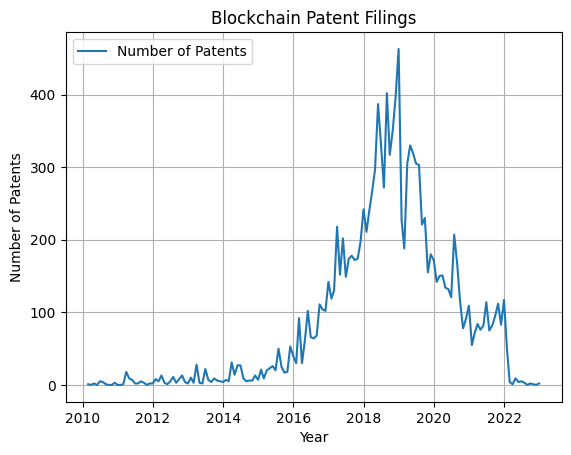

ADF Statistic: -1.23756373605942
p-value: 0.6572316967323205


In [157]:
# Visualize the time series data
plt.plot(us_patents_per_month)
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.title('Blockchain Patent Filings')
plt.legend(['Number of Patents','Percentage Change'])
#plt.xticks(patents_per_year_df['filingYear'], rotation=45)
plt.grid()
plt.show()

# Perform Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(us_patents_per_month['number_of_patents'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

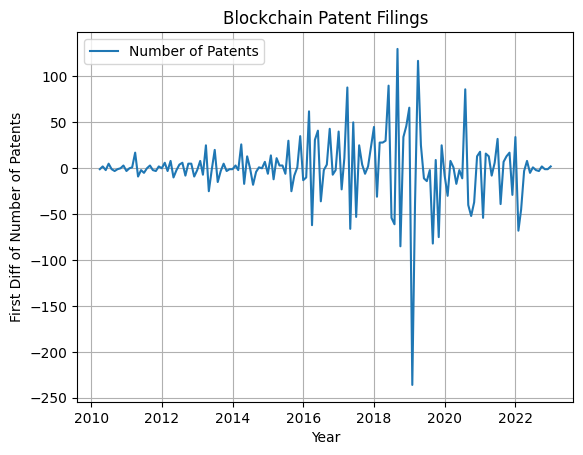

In [158]:
# Perform first differencing to make the data stationary
us_patents_per_month_df_diff = us_patents_per_month.diff().dropna()

# Visualize the time series data
plt.plot(us_patents_per_month_df_diff)
plt.xlabel('Year')
plt.ylabel('First Diff of Number of Patents')
plt.title('Blockchain Patent Filings')
plt.legend(['Number of Patents','Percentage Change'])
#plt.xticks(patents_per_year_df['filingYear'], rotation=45)
plt.grid()
plt.show()

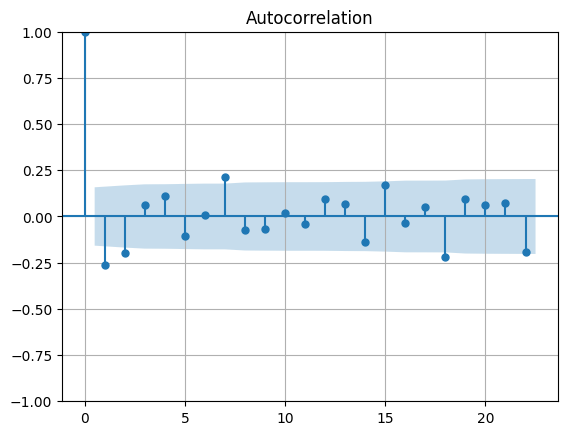

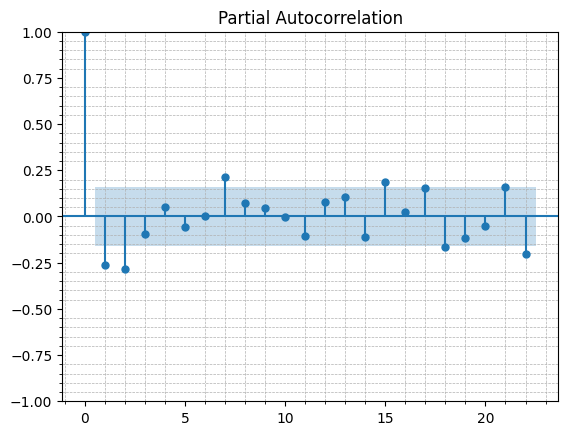

In [159]:
# Plot ACF and PACF plots
plot_acf(us_patents_per_month_df_diff['number_of_patents'])
plt.grid()
plot_pacf(us_patents_per_month_df_diff['number_of_patents'])  # Use a smaller number of lags
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True, which='major', linestyle='--', linewidth=0.7)
plt.grid()
plt.show()



### Based on PACF, we should start with an Auto Regressive Model with lags 1, 2, 7, 15, ....

### Get training and test sets

In [160]:
# Set the date index and resample to monthly frequency

#us_patents_per_month_df_diff = us_patents_per_month_df_diff.asfreq('M')
print(us_patents_per_month_df_diff)
train_end = datetime(2021,12,1)
test_end = datetime(2022,12,1)

#train_data = patents_per_month_df_diff['number_of_patents']  # Select the target column
train_data = us_patents_per_month_df_diff[:train_end]
test_data = us_patents_per_month_df_diff[train_end + timedelta(days=1):test_end]



               number_of_patents
priority_date                   
2010-03-31                  -1.0
2010-04-30                   2.0
2010-05-31                  -2.0
2010-06-30                   5.0
2010-07-31                  -1.0
...                          ...
2022-08-31                  -3.0
2022-09-30                   2.0
2022-10-31                  -1.0
2022-11-30                  -1.0
2022-12-31                   2.0

[154 rows x 1 columns]


## Fit the AR Model

In [161]:
#create the model

model = ARIMA(train_data, order=(7,1,0))


In [162]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)


Model Fitting Time: 0.2642960548400879


In [163]:
#summary of model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      number_of_patents   No. Observations:                  141
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -697.407
Date:                Tue, 29 Aug 2023   AIC                           1410.814
Time:                        16:15:41   BIC                           1434.347
Sample:                    03-31-2010   HQIC                          1420.377
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2957      0.066    -19.740      0.000      -1.424      -1.167
ar.L2         -1.4607      0.108    -13.472      0.000      -1.673      -1.248
ar.L3         -1.3776      0.150     -9.200      0.0

In [164]:

#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [165]:

#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

#convert predictions to dataframe with index column= 'priority_date' and next column= 'number_of_patents'
# Convert the dictionary to a DataFrame
predictions = pd.DataFrame(predictions.items(), columns=['priority_date', 'number_of_patents'])
predictions['priority_date'] = pd.to_datetime(predictions['priority_date'])  # Convert the 'priority_date' column to datetime
predictions.set_index('priority_date', inplace=True)  # Set 'priority_date' as the index


residuals = test_data - predictions
#print(test_data)
#print(predictions)
print(residuals)




               number_of_patents
priority_date                   
2021-12-31             24.488196
2022-01-31            -79.002285
2022-02-28            -37.431211
2022-03-31             -0.436520
2022-04-30             -1.809387
2022-05-31             -7.757817
2022-06-30              8.747002
2022-07-31             -3.949809
2022-08-31             -9.777072
2022-09-30              3.682760
2022-10-31              0.316458
2022-11-30             -5.146631


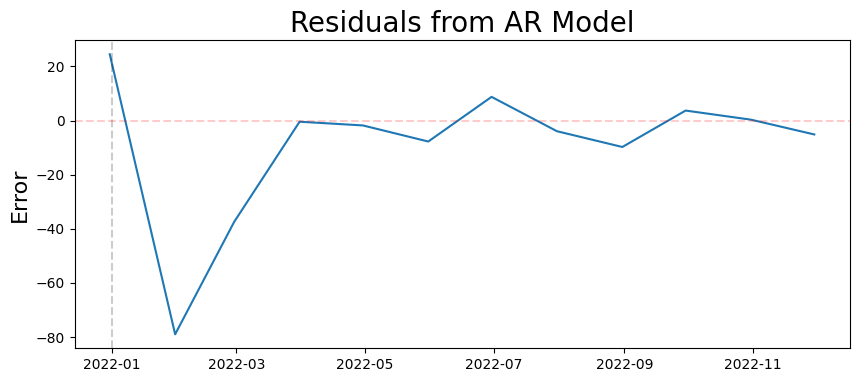

In [166]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

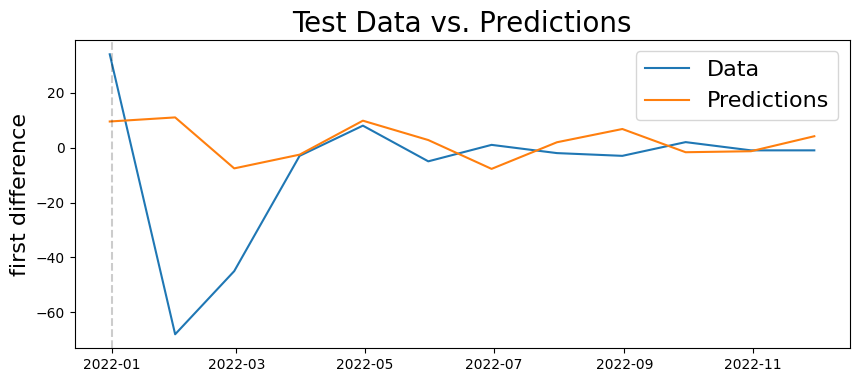

In [167]:
plt.figure(figsize=(10, 4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Test Data vs. Predictions', fontsize=20)
plt.ylabel('first difference', fontsize=16)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [168]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(residuals['number_of_patents']/test_data['number_of_patents'])), 4))

Mean Absolute Percentage Error: 2.1602


In [169]:
print('Root Mean Square Error:', np.sqrt(np.mean(residuals['number_of_patents']**2)))

Root Mean Square Error: 26.667129067993066
